In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage.filters import gaussian


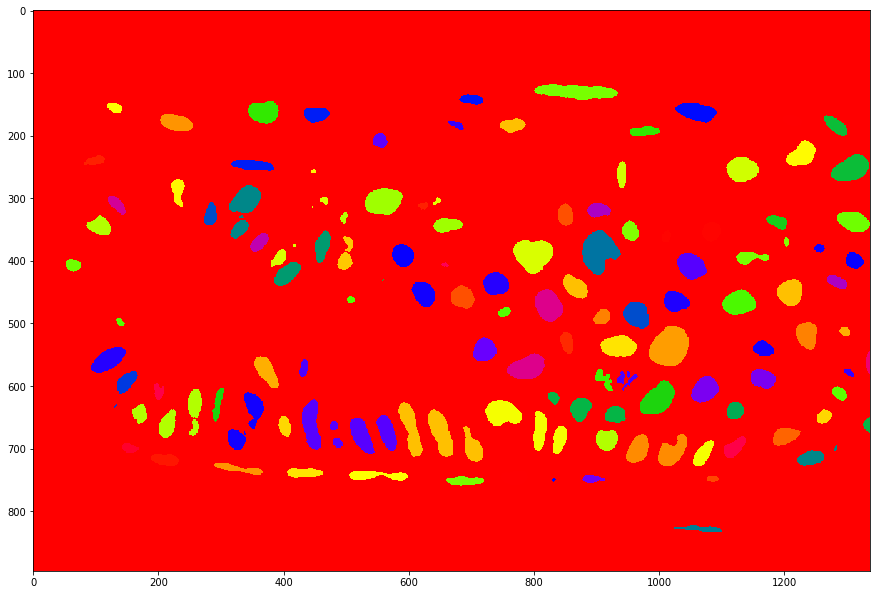

In [26]:
file = '/home/adrian/workspace/ilastik-datasets/Vladyslav/gt_final_090819.h5'
element_size_um = np.array([1., 0.17297205, 0.17297205])

with h5py.File(file, 'r+') as f:
    label = f['label'][...]
    # smooth labels
    label = gaussian(label.astype('float'), sigma=1)
    label[label >= 0.5] = 1
    label[label < 0.5] = 0
    # connected components
    segm = measure.label(label, connectivity=1)
    if 'labels' in f:
        del f['labels']
    ds = f.create_dataset('labels', data=segm.astype('uint16'), compression='gzip')
    ds.attrs['element_size_um'] = element_size_um
    # plot
    plt.figure(figsize=(15,15))
    plt.imshow(segm[60], cmap='prism')

In [27]:
# make train/val split from a single GT file

train1 = '/home/adrian/workspace/ilastik-datasets/Vladyslav/train1_final_090819.h5'
train2 = '/home/adrian/workspace/ilastik-datasets/Vladyslav/train2_final_090819.h5'
val1 = '/home/adrian/workspace/ilastik-datasets/Vladyslav/val_final_090819.h5'

with h5py.File(file, 'r') as f:
    raw1 = f['raw'][:,0:390,:]
    raw_val = f['raw'][:,390:530,:]
    raw2 = f['raw'][:,530:,:]
    
    l = (f['labels'][...] > 0).astype('uint8')
    label1 = l[:,0:390,:]
    label_val = l[:,390:530,:]
    label2 = l[:,530:,:]
    
    labels1 = f['labels'][:,0:390,:]
    labels_val = f['labels'][:,390:530,:]
    labels2 = f['labels'][:,530:,:]
    
    with h5py.File(train1, 'w') as f:
        f.create_dataset('raw', data=raw1, compression='gzip')
        f.create_dataset('label', data=label1, compression='gzip')
        f.create_dataset('labels', data=labels1, compression='gzip')
    with h5py.File(train2, 'w') as f:
        f.create_dataset('raw', data=raw2, compression='gzip')
        f.create_dataset('label', data=label2, compression='gzip')
        f.create_dataset('labels', data=labels2, compression='gzip')
    with h5py.File(val1, 'w') as f:
        f.create_dataset('raw', data=raw_val, compression='gzip')
        f.create_dataset('label', data=label_val, compression='gzip')
        f.create_dataset('labels', data=labels_val, compression='gzip')